### Bagging

Methods such as Decision Trees, can be prone to overfitting on the training set which can lead to wrong predictions on new data.

Bootstrap Aggregation (bagging) is a ensembling method that attempts to resolve overfitting for classification or regression problems. Bagging aims to improve the accuracy and performance of machine learning algorithms. It does this by taking random subsets of an original dataset, with replacement, and fits either a classifier (for classification) or regressor (for regression) to each subset. The predictions for each subset are then aggregated through majority vote (every individual classifier votes for a class, and the majority wins) for classification or averaging for regression, increasing prediction accuracy.

### Evaluating a Base Classifier

To see how bagging can improve model performance, we must start by evaluating how the base classifier performs on the dataset.  Bagging is a continuation of the concept of Decision Trees.

We will be looking to identify different classes of wines found in Sklearn's wine dataset.

Let's start by importing the necessary modules.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

Next we need to load in the data and store it into X (input features) and y (target). The parameter as_frame is set equal to True so that we do not lose the feature names when loading the data. (sklearn version older than 0.23 must skip the as_frame argument as it is not supported)

In [8]:
data = datasets.load_wine () # (as_frame = True)

X = data.data
y = data.target

#print (X)
#print (y)

The load_wine method from the datasets module is used to load the wine dataset for machine learning classification problems. It is a classic and multi-class dataset. This dataset contains 13 different parameters for wine with 178 samples. The purpose of this wine dataset in scikit-learn is to predict the best wine class among 3 classes.

In order to properly evaluate our model on unseen data, we need to split X and y into train and test sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

sklearn.model_selection.train_test_split -- test_size: float or int, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

sklearn.model_selection.train_test_split -- random_state: int, RandomState instance or None, default=None
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

With our data prepared, we can now instantiate a base classifier and fit it to the training data.

In [11]:
dtree = DecisionTreeClassifier(random_state = 22)

# random_state parameter controls the randomness of the estimator. 
# To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer.

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=22, splitter='best')

We can now predict the class of wine by the test set and evaluate the model performance.

In [12]:
y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

# sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
# It is the accuracy classification score. In multilabel classification, this function computes subset accuracy.

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


The base classifier performs reasonably well on the dataset achieving 82% accuracy on the test dataset with the current parameters (Different results may occur if you do not have the random_state parameter set).

Now that we have a baseline accuracy for the test dataset, we can see how the Bagging Classifier outperforms a single Decision Tree Classifier.

### Creating a Bagging Classifier

For bagging we need to set the parameter n_estimators, this is the number of base classifiers that our model is going to aggregate together.

For this sample dataset the number of estimators is relatively low, it is often the case when much larger ranges are explored. Hyperparameter tuning is usually done with a grid search, but for now we will use a select set of values for the number of estimators.

We start by importing the necessary model.

In [13]:
from sklearn.ensemble import BaggingClassifier

Now lets create a range of values that represent the number of estimators we want to use in each ensemble.

In [14]:
estimator_range = [2,4,6,8,10,12,14,16]

To see how the Bagging Classifier performs with differing values of n_estimators (the number of base classifiers that our model is going to aggregate together) we need a way to iterate over the range of values and store the results from each ensemble. To do this we will create a for loop, storing the models and scores in separate lists for later vizualizations.

TNote: The default parameter for the base classifier in BaggingClassifier is the DicisionTreeClassifier. Therefore, we do not need to set it when instantiating the bagging model.

In [18]:
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

With the models and scores stored, we can now visualize the improvement in model performance.

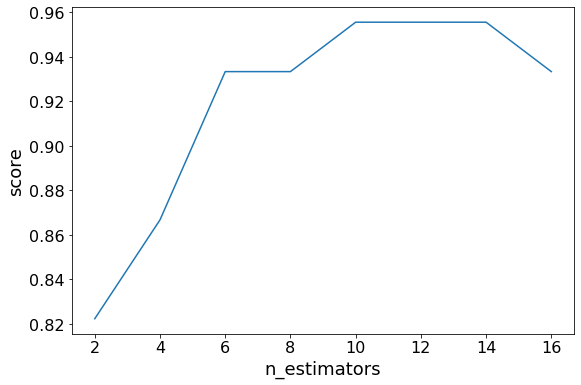

In [20]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

### Results Explained

By iterating through different values for the number of estimators we can see an increase in model performance from 82.2% to 95.5%. After 14 estimators the accuracy begins to drop. Again, if you set a different random_state the values you see will vary. That is why it is best practice to use cross validation (next topic in the class) to ensure stable results.

In this case, we see a 13.3% increase in accuracy when it comes to identifying the type of the wine.

### Another Form of Evaluation

As bootstrapping chooses random subsets of observations to create classifiers, there are observations that are left out in the selection process. These "out-of-bag" observations can then be used to evaluate the model, similarly to that of a test set. Keep in mind, that out-of-bag estimation can overestimate error in binary classification problems and should only be used as a compliment to other metrics.

We saw in the last exercise that 12 estimators yielded the highest accuracy, so we will use that to create our model. This time setting the parameter oob_score to true to evaluate the model with out-of-bag score.

Now let's create a model with out-of-bag metric.

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine () # (as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True, random_state = 22)

# oob_score decides whether to use out-of-bag samples to estimate the generalization error.

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


Since the samples used in OOB and the test set are different, and the dataset is relatively small, there is a difference in the accuracy. It is rare that they would be exactly the same, again OOB should be used as a quick mean for estimating error, but is not the only evaluation metric.

### Generating Decision Trees from Bagging Classifier

As was seen in the Decision Tree lesson, it is possible to graph the decision tree the model created. It is also possible to see the individual decision trees that went into the aggregated classifier. This helps us to gain a more intuitive understanding on how the bagging model arrives at its predictions.

Note: This is only functional with smaller datasets, where the trees are relatively shallow and narrow. Thus, making them easy to visualize.

We will need to import plot_tree function from sklearn.tree. The different trees can be graphed by changing the estimator you wish to visualize.

Let's generate Decision Trees from Bagging Classifier.

[Text(767.25, 951.3000000000001, 'X[12] <= 727.5\nentropy = 0.612\nsamples = 82\nvalue = [55, 59, 19]'),
 Text(418.5, 679.5, 'X[6] <= 1.335\nentropy = 0.342\nsamples = 47\nvalue = [0, 57, 16]'),
 Text(279.0, 407.70000000000005, 'X[10] <= 0.92\nentropy = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(139.5, 135.89999999999998, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(418.5, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(558.0, 407.70000000000005, 'entropy = 0.0\nsamples = 32\nvalue = [0, 54, 0]'),
 Text(1116.0, 679.5, 'X[6] <= 1.605\nentropy = 0.156\nsamples = 35\nvalue = [55, 2, 3]'),
 Text(837.0, 407.70000000000005, 'X[9] <= 4.325\nentropy = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(697.5, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(976.5, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(1395.0, 407.70000000000005, 'X[4] <= 147.0\nentropy = 0.035\nsamples = 32\nvalue = [55, 

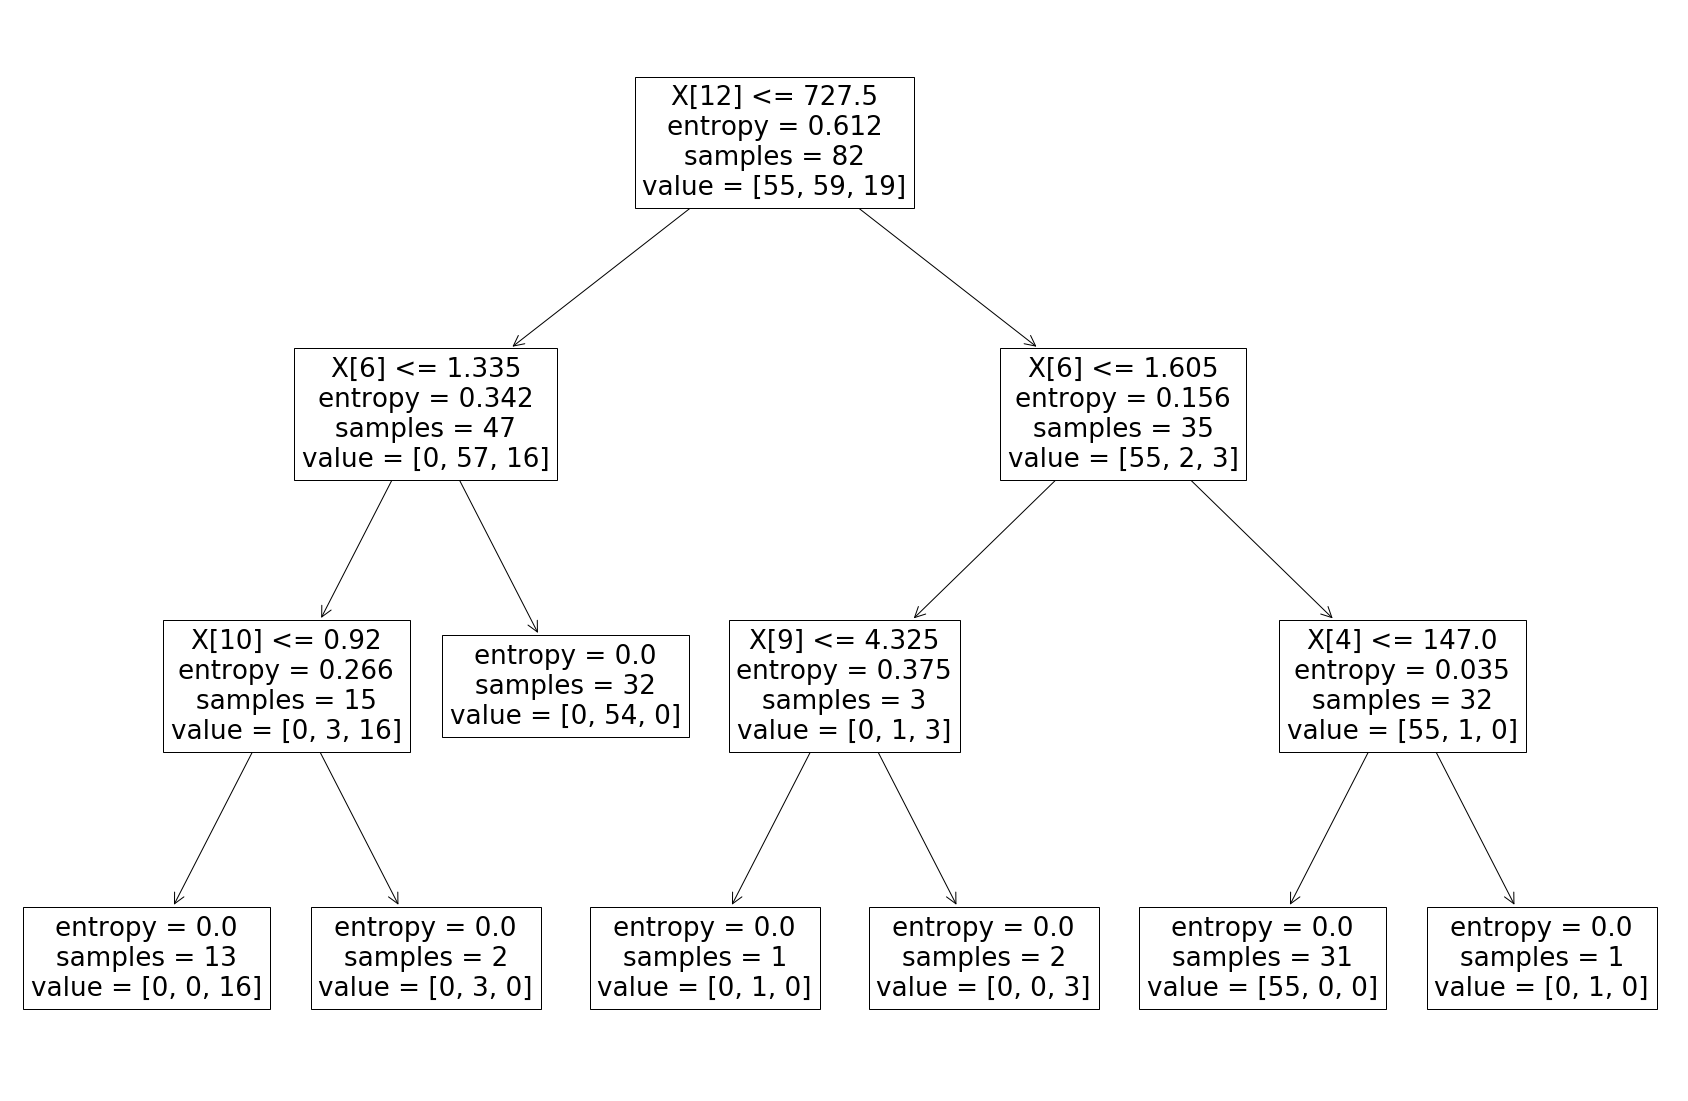

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True, random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0]) # Plot a decision tree. First parameter "clf.estimators_[0]" is the decision tree to be plotted.

# plot_tree(clf.estimators_[0], feature_names = X.columns) 
# feature_names: list of strings, default=None -- Names of each of the features. 
                                                # If None, generic names will be used (“X[0]”, “X[1]”, …).

Here we can see just the first decision tree that was used to vote on the final prediction. Again, by changing the index of the classifier you can see each of the trees that have been aggregated.

Note: Useful information about gini and entropy can be found at https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb